In [1]:

!pip3 install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 1.1 MB/s 


Generation = 1
Fitness    = -19.388696898526142
Change     = -19.388696898526142
Generation = 2
Fitness    = -13.9624028013929
Change     = 5.426294097133242
Generation = 3
Fitness    = -11.09902736446552
Change     = 2.863375436927379
Generation = 4
Fitness    = -9.005153300236955
Change     = 2.093874064228565
Generation = 5
Fitness    = -5.7999111467835895
Change     = 3.2052421534533657
Generation = 6
Fitness    = -4.085476555607773
Change     = 1.7144345911758165
Generation = 7
Fitness    = -2.9847648782107923
Change     = 1.1007116773969807
Generation = 8
Fitness    = -1.9755826410766792
Change     = 1.009182237134113
Generation = 9
Fitness    = -1.4449026071264166
Change     = 0.5306800339502626
Generation = 10
Fitness    = -0.7175120598407487
Change     = 0.7273905472856679


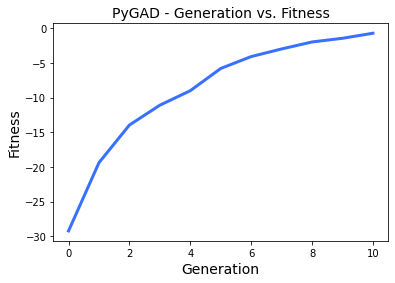

Parameters of the best solution : [-0.03010767 -0.01756983 -0.28305841  0.3087337  -0.05307033 -0.12487625
 -0.25309273  0.23137287 -0.34747021  0.53303181]
Fitness value of the best solution = -0.7175120598407487
Index of the best solution : 13
Predicted output based on the best solution : -0.361070488422083
Best fitness value reached after 10 generations.


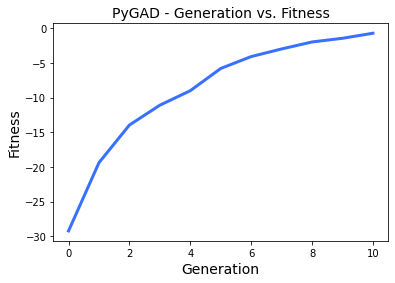

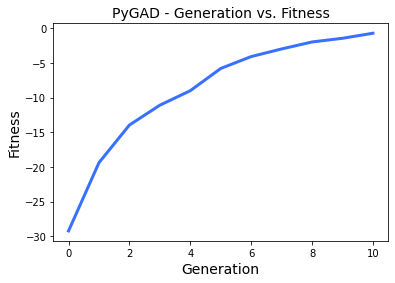

In [4]:
import pygad
import numpy


def function_inputs(x, y):
  return 25*(y+x**2)**2 + (1 + x)**2


# Function to minimize  25*(y+x**2)**2 + (1 + x)**2
def fitness_func(solution, solution_idx):
    # Calculating the fitness value 
    output = numpy.sum(solution*solution)
    fitness =-numpy.abs(output)
    return fitness

fitness_function = fitness_func

num_generations = 10 # Number of generations.
num_parents_mating = 4 # Number of solutions to be selected as parents in the mating pool.


sol_per_pop = 50 # Number of  population.
num_genes = 10 # generation

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# instance of the GA class inside the ga module
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       on_generation=callback_generation)

# Running the GA
ga_instance.run()

ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

prediction = numpy.sum(numpy.array(num_genes)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' 
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()